In [102]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import subprocess

In [105]:
data_tr = pd.read_csv('./data/boston_transform.csv', 
                      index_col = 'original_idx')
data_missing = pd.read_csv('./data/boston_nan.csv',
                           index_col = 'original_idx')

In [113]:
em_imp = pd.read_csv('./data/em_imp.csv', index_col=0)
em_imp.head()

,RM,LSTAT,RAD,CRIM,PTRATIO,DIS,ZN,NOX,CHAS,B,TAX,INDUS,AGE,MEDV
4,7.408049,1.461482,5,-1.542938,-1.546704,6.0622,0.0,0.458,0,396.90,222,2.18,54.2,36.2
17,5.723967,3.530537,3,-1.091328,1.026592,4.2579,0.0,0.538,0,386.75,307,8.14,81.7,17.5
22,5.601107,3.714877,5,0.149672,-0.958858,3.9769,0.0,0.538,0,396.90,307,8.14,91.7,15.2
32,6.327672,3.501619,7,-0.167309,-1.001809,3.9900,0.0,0.538,0,232.60,307,8.14,82.0,13.2
33,5.834947,3.363702,4,-0.341897,-0.829245,3.7872,0.0,0.538,0,358.77,307,8.14,95.0,13.1


In [114]:
rm_true = []
lstat_true = []
rad_true = []
crim_true = []
ptr_true = []

rm_imp = []
lstat_imp = []
rad_imp = []
crim_imp = []
ptr_imp = []

rmidx = np.where(data_missing['RM'].isnull()==True)[0]
lsidx = np.where(data_missing['LSTAT'].isnull()==True)[0]
raidx = np.where(data_missing['RAD'].isnull()==True)[0]
cridx = np.where(data_missing['CRIM'].isnull()==True)[0]
ptidx = np.where(data_missing['PTRATIO'].isnull()==True)[0]

for i in rmidx:
    rm_true.append(data_tr.loc[i,'RM'])
    rm_imp.append(em_imp.loc[i,'RM'])

for i in lsidx:
    lstat_true.append(data_tr.loc[i,'LSTAT'])
    lstat_imp.append(em_imp.loc[i,'LSTAT'])
    
for i in raidx:
    rad_true.append(data_tr.loc[i,'RAD'])
    rad_imp.append(em_imp.loc[i,'RAD'])
    
for i in cridx:
    crim_true.append(data_tr.loc[i,'CRIM'])
    crim_imp.append(em_imp.loc[i,'CRIM'])
    
for i in ptidx:
    ptr_true.append(data_tr.loc[i,'PTRATIO'])
    ptr_imp.append(em_imp.loc[i,'PTRATIO'])
    
    

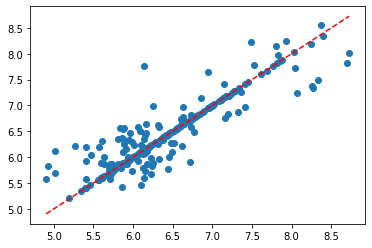

In [115]:
x = np.linspace(min(rm_true), max(rm_true))
plt.scatter(rm_true, rm_imp)
plt.plot(x, x, 'r--')
plt.show()

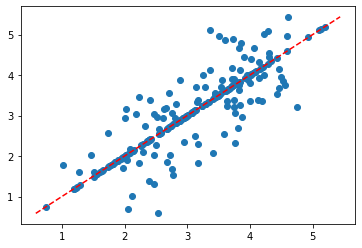

In [116]:
x = np.linspace(min(lstat_true), max(lstat_true))
plt.scatter(lstat_imp, lstat_true)
plt.plot(x, x, 'r--')
plt.show()

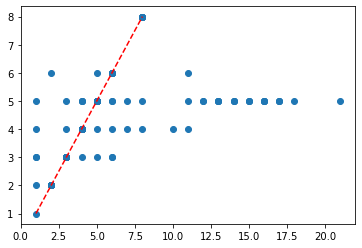

In [117]:
x = np.linspace(min(rad_imp+rad_true), max(lstat_imp+rad_true))
plt.scatter(rad_imp, rad_true)
plt.plot(x, x, 'r--')
plt.show()